In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from datetime import datetime

In [2]:
dffilm = pd.read_csv(Path('./Resources/train.csv'))

In [3]:
dffilm.drop(['id','belongs_to_collection','budget','genres','homepage',
            'imdb_id','original_language','original_title','overview','poster_path','production_companies',
            'production_countries','popularity','runtime','spoken_languages',
            'status','tagline','title','Keywords','cast','crew'], axis=1, inplace=True)
dffilm.head()

,release_date,revenue
0,12/22/12,10703234
1,12/4/03,234748
2,11/15/13,850259
3,10/27/11,12935800
4,8/25/75,39598448


In [4]:
# converting film date to day of year

for m in range(0,len(dffilm.release_date)):
    film_date = dffilm.release_date[m]
    dt = datetime.strptime(film_date, '%m/%d/%y')
    #dffilm.release_date[m] = datetime_object.timetuple().tm_yday
    dffilm.release_date[m]= dt.month
 
print(dffilm)

/var/folders/23/mc3swhfd7ts230fqc9_j4xqw0000gn/T/ipykernel_9171/2613406085.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffilm.release_date[m]= dt.month


     release_date    revenue
0              12   10703234
1              12     234748
2              11     850259
3              10   12935800
4               8   39598448
...           ...        ...
2995           10  122700000
2996            6   71000000
2997            5     871279
2998           10      31000
2999            3      65335

[3000 rows x 2 columns]


0       12
1       12
2       11
3       10
4        8
        ..
2995    10
2996     6
2997     5
2998    10
2999     3
Name: release_date, Length: 3000, dtype: object


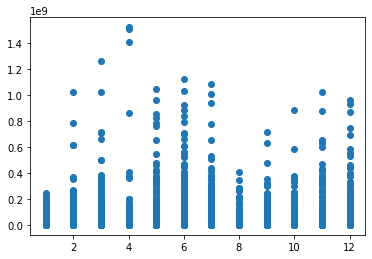

In [5]:
plt.scatter(dffilm.release_date, dffilm.revenue)
print(dffilm.release_date)

In [6]:
X = dffilm.release_date.values.reshape(-1, 1)
X[:5]

array([[12],
       [12],
       [11],
       [10],
       [8]], dtype=object)

In [7]:
X.shape

(3000, 1)

In [8]:
y=dffilm.revenue

In [9]:
# Create a model with scikit-learn
model = LinearRegression()
model
X
y

0        10703234
1          234748
2          850259
3        12935800
4        39598448
          ...    
2995    122700000
2996     71000000
2997       871279
2998        31000
2999        65335
Name: revenue, Length: 3000, dtype: int64

In [10]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [11]:
# The slope
print(model.coef_)

[813465.00398058]


In [12]:
# The y-intercept
print(model.intercept_)

61214355.33169693


In [15]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)
#print(predicted_y_values)
print(predicted_y_values)
#print(X)

[70975935.37946385 70975935.37946385 70162470.37548327 ...
 65281680.35159981 69349005.3715027  63654750.34363866]


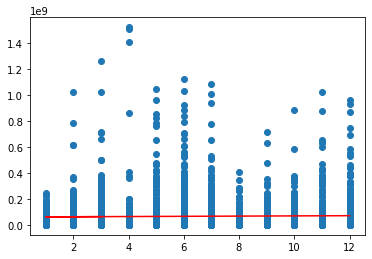

In [16]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X,predicted_y_values,color='red')

In [17]:
dffilm['release_date'].describe()

count     3000
unique      12
top          9
freq       362
Name: release_date, dtype: int64